<a href="https://colab.research.google.com/github/nilavya2000/tf_tutorial/blob/master/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing the libraries***

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import shutil

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from  tensorflow.keras.models import Sequential

***Importing the dataset***

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 4s 0us/step


In [4]:
zip_dir_base = os.path.dirname(zip_file)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/dandelion


In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [6]:
round(len(images)*0.8)

639

In [7]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

***Data Argumentation***

In [8]:
BATCH = 100
IMG_SHAPE = 150

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

**applying *horizontal flip***

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=BATCH,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


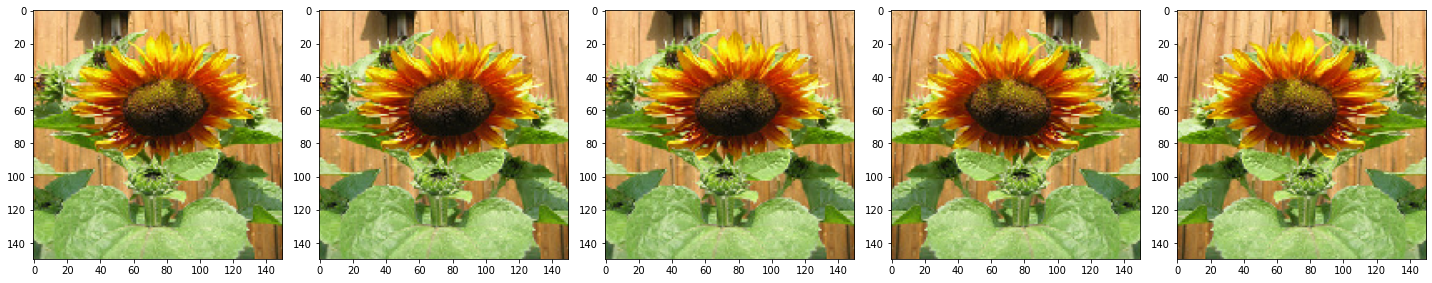

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**applying *various kinds of image transformation***

In [13]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=BATCH,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


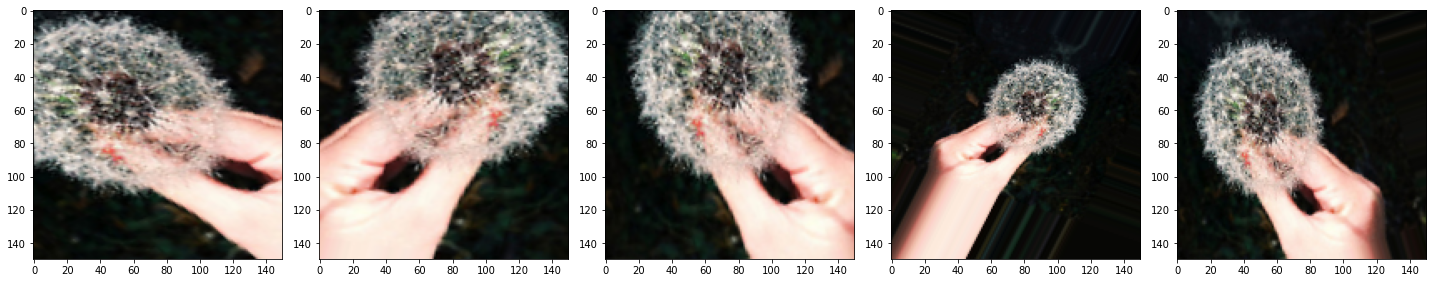

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

***Data generator for validation set***

In [15]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


***Create the CNN***

In [16]:
model=Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

*compile the model*

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

*train the model*

In [19]:
EPOCHS=80
history=model.fit_generator(
      train_data_gen, steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(val_data_gen.n))
  )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
30/30 [==============================] - 84s 3s/step - loss: 1.5616 - accuracy: 0.3026 - val_loss: 1.2719 - val_accuracy: 0.4204
Epoch 2/80
30/30 [==============================] - 84s 3s/step - loss: 1.2466 - accuracy: 0.4443 - val_loss: 1.1025 - val_accuracy: 0.5605
Epoch 3/80
30/30 [==============================] - 84s 3s/step - loss: 1.0967 - accuracy: 0.5543 - val_loss: 1.0590 - val_accuracy: 0.5728
Epoch 4/80
30/30 [==============================] - 84s 3s/step - loss: 1.0372 - accuracy: 0.5826 - val_loss: 0.9126 - val_accuracy: 0.6585
Epoch 5/80
30/30 [==============================] - 88s 3s/step - loss: 1.0141 - accuracy: 0.6078 - val_loss: 0.9318 - val_accuracy: 0.6449
Epoch 6/80
30/30 [==============================] - 85s 3s/step - loss: 0.9672 - accuracy: 0.6259 - val_loss: 0.8901 - val_accuracy: 0.6490
Epoch 7/80
30/30 [==============================] - 85s 3s/step - loss: 0.9005 - acc

***Plot the training and validation graphs***

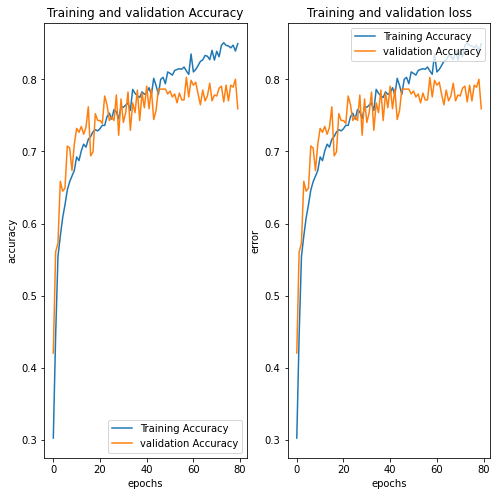

In [20]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='validation Accuracy')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Training and validation loss')
plt.show()